<a href="https://colab.research.google.com/github/naranjitoct/UPCT_IA_2022/blob/main/00_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Let's begin !!

## Importing libraries and mounting Drive unit

In [2]:
import pandas as pd
import numpy as np


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Extracting data from CSV files

In [3]:
data_drink=pd.read_csv('/content/drive/MyDrive/IA2022/00_TrabajoIA/DW/drinks.csv')
data2_life=pd.read_csv('/content/drive/MyDrive/IA2022/00_TrabajoIA/DW/lifeexpectancy.csv')

# Analyzing the data

## ✅ Let's take a look to the table

In [4]:
data_drink.shape

(193, 5)

In [5]:
data_drink.head(15)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,NaN
1,Albania,89,132,54,NaN
2,Algeria,25,0,14,NaN
3,Andorra,245,138,312,NaN
4,Angola,217,57,45,NaN
5,Antigua & Barbuda,102,128,45,NaN
6,Argentina,193,25,221,NaN
7,Armenia,21,179,11,NaN
8,Australia,261,72,212,NaN
9,Austria,279,75,191,NaN


In [6]:
data_drink.info() #Something strange... Dtype is an object ... not a number for columns !=0.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    object 
 2   spirit_servings               193 non-null    object 
 3   wine_servings                 193 non-null    object 
 4   total_litres_of_pure_alcohol  0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 7.7+ KB


## ✅ Looking for nulls and Not A Number... No result... (somehting weird...)

In [7]:
pd.isnull(data_drink).sum()

country                           0
beer_servings                     0
spirit_servings                   0
wine_servings                     0
total_litres_of_pure_alcohol    193
dtype: int64

In [8]:
pd.isna(data_drink).sum()

country                           0
beer_servings                     0
spirit_servings                   0
wine_servings                     0
total_litres_of_pure_alcohol    193
dtype: int64

## ❗ FAILURE !!! .... Character '?' has been used instead of blanks, nulls ...

In [ ]:
# Error when trying to cast from string to float. Message notices '?' character
data_drink.beer_servings = data_drink.beer_servings.astype(float) 

SIDE NOTE (to remember):

>> **loc** is based on columns name

> >**iloc** similar but based on column ID (from 0)





pandas.Series.str.contains

 Test if pattern or regex (Regular expresion) is contained within a string of a Series or Index.

  regexbool, default True

  > If True, assumes the pat is a regular expression.

  > If False, treats the pat as a literal string.

 
 These are examples that clarify this REGular EXpresion concept

data_drink.loc[data_drink['beer_servings'].str.contains('11?49', regex=False)] 

data_drink.loc[data_drink['beer_servings'].str.contains('11?49', regex=True)]

In [10]:
data_drink.loc[data_drink['beer_servings'].str.contains('?', regex=False)] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
99,Macedonia,?,27,86,NaN


In [11]:
data_drink.loc[data_drink['spirit_servings'].str.contains('?', regex=False)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
46,Denmark,224,?,278,NaN


In [12]:
data_drink.loc[data_drink['wine_servings'].str.contains('?', regex=False)] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
11,Bahamas,122,176,?,NaN


##Replace '?' . 

What is the best approach ?

 >> #1. Using mean for the column. (I guess not so goood...

 >> #2. We could drop as they are 3 among aprox 200.... and forget about them. In this example we could lost more data in future steps.

 >> #3. Ratio Average of consum for the rest of the countries


 I will try to execute #3 as it is probably a good approach that avoid data losses and simple column average could penalize last column calculation for these 3 countries.


 Also it will combine lot of slicing, filters, ...etc. So it is also great to practice

 

In [67]:
df=data_drink
df = data_drink[ (data_drink['beer_servings'] != '?') & (data_drink['spirit_servings'] != '?') & (data_drink['wine_servings'] != '?')]
df.shape # Original was (193,5). Three rows will be drop (Macedonia, Denmark and Bahamas)

(190, 5)

In [68]:
# Removing warning by slicing utilization.
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

In [83]:
# Now 3 rows with issue are dropped I could cast columns as float. 
df.beer_servings = df.beer_servings.astype(float) 
df.spirit_servings = df.spirit_servings.astype(float) 
df.wine_servings = df.wine_servings.astype(float) 

In [84]:
# That's better... Float64 for our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       190 non-null    object 
 1   beer_servings                 190 non-null    float64
 2   spirit_servings               190 non-null    float64
 3   wine_servings                 190 non-null    float64
 4   total_litres_of_pure_alcohol  190 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.9+ KB


As indication of the dataframe webportal. Total_litres column should be calculated based on an alcohol graduation stimation

REFERENCE (and stimation) :

https://es.wikipedia.org/wiki/Anexo:Bebidas_alcoh%C3%B3licas_seg%C3%BAn_su_graduaci%C3%B3n


BEER : (2,5% - 20%) : 7 %  

WINE: (5,5% - 14%) : 11%

SPIRITS: (>35 %) : 50%



In [119]:
df.total_litres_of_pure_alcohol=0.07*df.beer_servings+0.5*df.spirit_servings+0.11*df.wine_servings

In [80]:
# Finally calculate all of them but total_litres show a NaN (something is wrong)
# mean_beer=np.mean(df.beer_servings)
# mean_wine=np.mean(df.wine_servings)
# mean_spirit=np.mean(df.spirit_servings)
# print(mean_beer)
# print(mean_wine)
# print(mean_spirit)


df.mean()

<ipython-input-80-5cfd817e61c9>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


beer_servings                   105.457895
spirit_servings                  80.778947
wine_servings                    48.047368
total_litres_of_pure_alcohol     40.291421
dtype: float64

In [120]:
df['tempcalc']=df['beer_servings']/(df['beer_servings']+df['wine_servings']+df['spirit_servings'])

In [121]:
df.head(5)
#df.total_litres_of_pure_alcohol

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,tempcalc
0,Afghanistan,0.0,0.0,0.0,0.00,NaN
1,Albania,89.0,132.0,54.0,78.17,0.323636
2,Algeria,25.0,0.0,14.0,3.29,0.641026
3,Andorra,245.0,138.0,312.0,120.47,0.352518
4,Angola,217.0,57.0,45.0,48.64,0.680251


In [122]:
df[df['tempcalc'].isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,tempcalc
0,Afghanistan,0.0,0.0,0.0,0.0,NaN
13,Bangladesh,0.0,0.0,0.0,0.0,NaN
78,Iran,0.0,0.0,0.0,0.0,NaN
89,Kuwait,0.0,0.0,0.0,0.0,NaN
96,Libya,0.0,0.0,0.0,0.0,NaN
103,Maldives,0.0,0.0,0.0,0.0,NaN
106,Marshall Islands,0.0,0.0,0.0,0.0,NaN
107,Mauritania,0.0,0.0,0.0,0.0,NaN
112,Monaco,0.0,0.0,0.0,0.0,NaN
127,North Korea,0.0,0.0,0.0,0.0,NaN


In [123]:
#Div by 0 will be NaN so replace by 0
df = df.fillna(0)

In [124]:
print(df.isna().sum())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
tempcalc                        0
dtype: int64


In [125]:
df[(df['tempcalc'] < 0.0001)]  # Lo veremos mejor en plots...

# https://www.citizen.co.za/lifestyle/food-and-drink/you-might-be-surprised-to-learn-which-country-consumes-the-most-alcohol/
# Lo deCook Islands parece que es un claro error... 
# Saudi Arabia is not so extrange to consum 0 liters


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,tempcalc
0,Afghanistan,0.0,0.0,0.0,0.00,0.0
13,Bangladesh,0.0,0.0,0.0,0.00,0.0
39,Cook Islands,0.0,254.0,74.0,135.14,0.0
78,Iran,0.0,0.0,0.0,0.00,0.0
89,Kuwait,0.0,0.0,0.0,0.00,0.0
96,Libya,0.0,0.0,0.0,0.00,0.0
103,Maldives,0.0,0.0,0.0,0.00,0.0
106,Marshall Islands,0.0,0.0,0.0,0.00,0.0
107,Mauritania,0.0,0.0,0.0,0.00,0.0
112,Monaco,0.0,0.0,0.0,0.00,0.0


#VISUALIZACION DE DATOS

In [126]:
import matplotlib.pyplot as plt

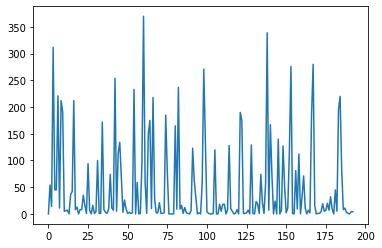

In [137]:
df['wine_servings'].plot()

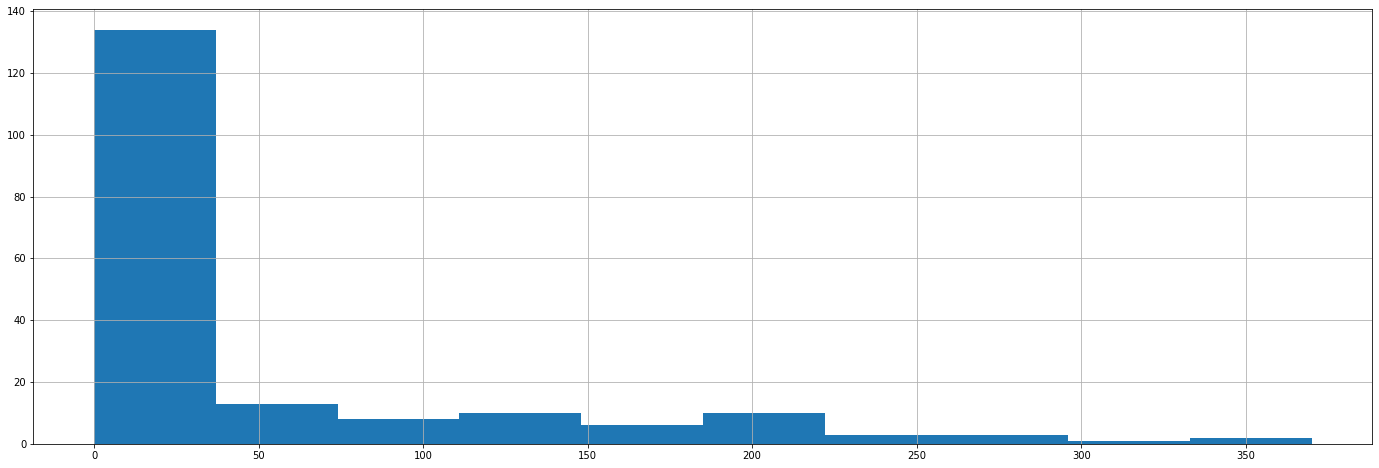

In [138]:
df['wine_servings'].hist(figsize=(24,8))

In [128]:
correlations = df.corr()
correlations

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,tempcalc
beer_servings,1.000000,0.461433,0.523196,0.629321,0.220482
spirit_servings,0.461433,1.000000,0.201398,0.967876,-0.307317
wine_servings,0.523196,0.201398,1.000000,0.417549,-0.158069
total_litres_of_pure_alcohol,0.629321,0.967876,0.417549,1.000000,-0.263208
tempcalc,0.220482,-0.307317,-0.158069,-0.263208,1.000000


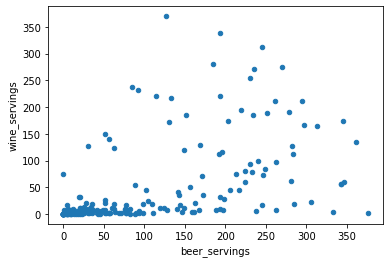

In [129]:
df.plot(kind="scatter", x="beer_servings", y="wine_servings")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f060b2a1a90>,
      dtype=object)

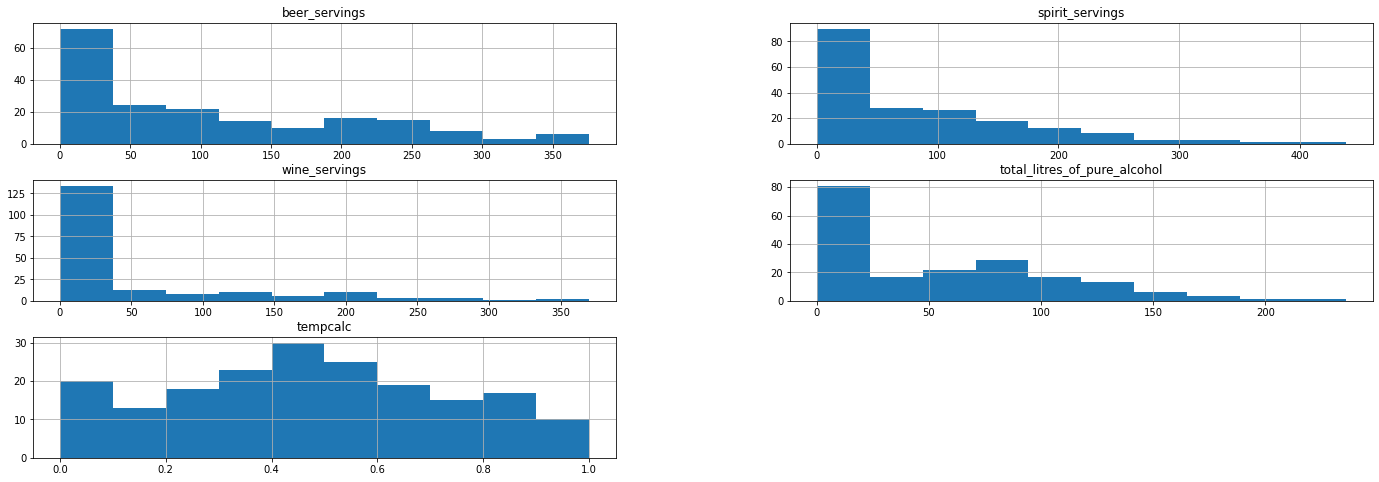

In [130]:
df.hist(figsize=(24,8))

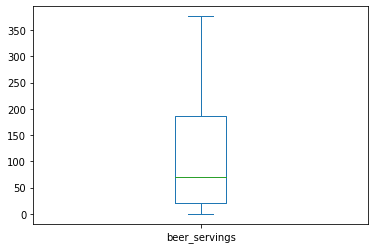

In [131]:
df['beer_servings'].plot(kind='box')

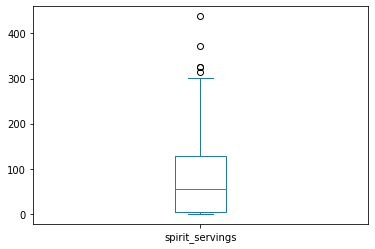

In [132]:
df['spirit_servings'].plot(kind='box')


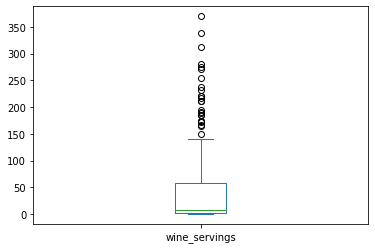

In [133]:
df['wine_servings'].plot(kind='box')

In [107]:
df.head(1) #Para copiar las filas.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,tempcalc
0,Afghanistan,0.0,0.0,0.0,0.0,0.0


In [136]:
import seaborn as sns

#sns.countplot(data=df, x=df['total_litres_of_pure_alcohol'])
sns.pairplot(df[(:,0:3)])

SyntaxError: ignored